x_len length :  759
1번 입력값 distribution


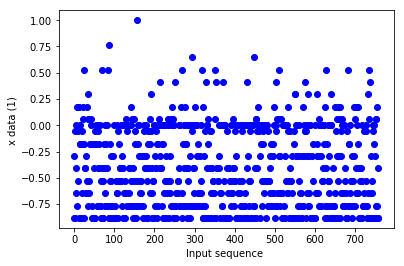

2번 입력값 distribution


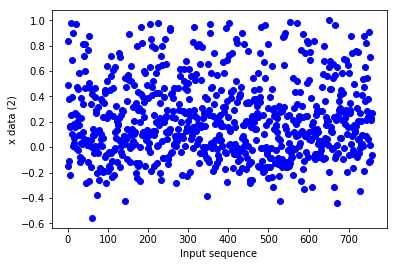

3번 입력값 distribution


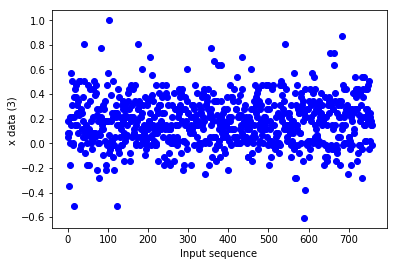

4번 입력값 distribution


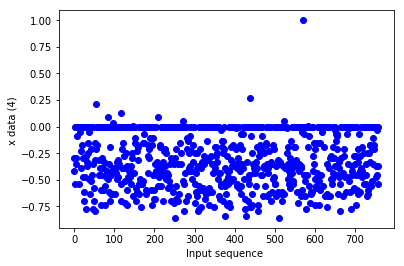

5번 입력값 distribution


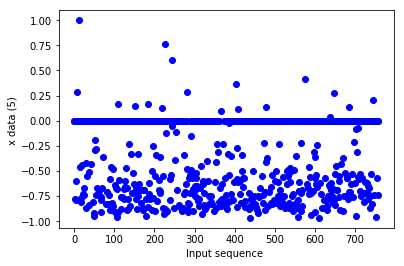

6번 입력값 distribution


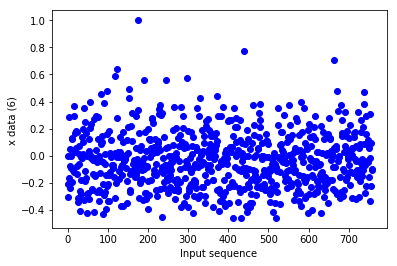

7번 입력값 distribution


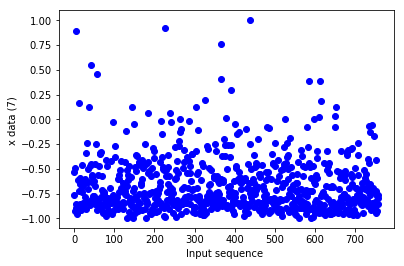

8번 입력값 distribution


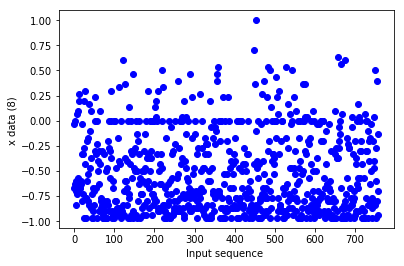

Y 출력값 distribution


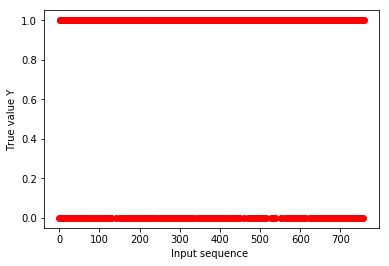

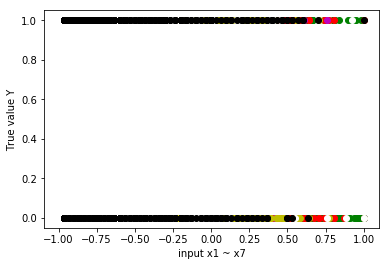

~~~~~~~~~~~~~~ Analysis ~~~~~~~~~~~~~~
10000 time learning

Accuracy :  0.7628459

Visualization (Prediction vs. True value) 


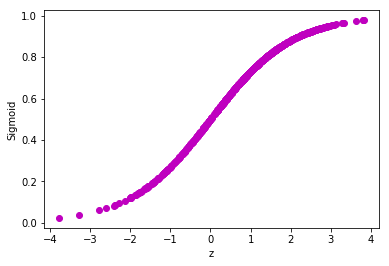

In [12]:
#ex05_2 (transform _ clasifying diabetes)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

xy = np.loadtxt('d:\\ai\data-03-diabetes.csv', delimiter=',', dtype=np.float32)  # (0~758) 759 line date  
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

def visual () :
    # Visualrization (Distribution of input X ) 
    x_len = len(x_data)  # data-03-diabetes.csv : 759 line
    line_x = [] # Initialize the list to store values (0 to 758) to graph

    print("x_len length : ", x_len)
    for i in range(x_len):
        x_data_0 = [v[0] for v in xy]  
        x_data_1 = [v[1] for v in xy] 
        x_data_2 = [v[2] for v in xy]
        x_data_3 = [v[3] for v in xy]
        x_data_4 = [v[4] for v in xy]   
        x_data_5 = [v[5] for v in xy]  
        x_data_6 = [v[6] for v in xy] 
        x_data_7 = [v[7] for v in xy] 
        y_data = [v[-1] for v in xy]  # True value Y
        line_x.append([i]) # Create a list to store values (0 to 758) to graph

    print ("1번 입력값 distribution") 
    plt.plot(line_x, x_data_0,'bo') # line_x : 759 , x_data_0 : 1번 열 data value  
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (1) ')
    plt.show()

    print ("2번 입력값 distribution") 
    plt.plot(line_x, x_data_1,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (2)' )
    plt.show()

    print ("3번 입력값 distribution") 
    plt.plot(line_x, x_data_2,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (3) ')
    plt.show()
        
    print ("4번 입력값 distribution") 
    plt.plot(line_x, x_data_3,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (4) ')
    plt.show()


    print ("5번 입력값 distribution") 
    plt.plot(line_x, x_data_4,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (5) ')
    plt.show()

    print ("6번 입력값 distribution") 
    plt.plot(line_x, x_data_5,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (6) ')
    plt.show()

    print ("7번 입력값 distribution") 
    plt.plot(line_x, x_data_6,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (7) ')
    plt.show()

    print ("8번 입력값 distribution") 
    plt.plot(line_x, x_data_7,'bo')
    plt.xlabel('Input sequence ')
    plt.ylabel('x data (8) ')
    plt.show()    

    print ("Y 출력값 distribution") 
    plt.plot(line_x, y_data,'ro') # line_x : 759 , y_data : 마지막 열 data value  

    plt.xlabel('Input sequence ')
    plt.ylabel('True value Y')
    plt.show()

    # Total visualrization (Distribution of input X and Y) 
    plt.plot(x_data_0,y_data,'bo')
    plt.plot(x_data_1,y_data,'go')
    plt.plot(x_data_2,y_data,'ro')
    plt.plot(x_data_3,y_data,'co')
    plt.plot(x_data_4,y_data,'mo')
    plt.plot(x_data_5,y_data,'yo')
    plt.plot(x_data_6,y_data,'wo')
    plt.plot(x_data_7,y_data,'ko')


    plt.xlabel('input x1 ~ x7')
    plt.ylabel('True value Y')
    plt.show() 

visual () 
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
z = tf.matmul(X, W)+b
hypothesis = tf.sigmoid(z)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


# Launch graph
with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())
   feed = {X: x_data, Y: y_data}

   for step in range(10001):
    cost_val,w_val, h, p, a, _ = sess.run([cost, W, hypothesis, predicted, accuracy, train ], feed_dict=feed)
   
   print ("~~~~~~~~~~~~~~ Analysis ~~~~~~~~~~~~~~")
   print (step, "time learning")
   print("\nAccuracy : ", a)
   x_re = sess.run(z,feed_dict=feed)

x_len = len(x_data)  
# Visualrization (Prediction vs. True value) 
for i in range(x_len):
    pp_data = [pp[0] for pp in p]    
    yy_data = [yy[-1] for yy in xy]  # True value Y
    
print ("\nVisualization (Prediction vs. True value) ") 
plt.plot(x_re, h,'mo')
plt.xlabel('z')
plt.ylabel('Sigmoid')
plt.show() 


